## Sobre o dataset
O conjunto de dados veio de uma enquete com os clientes da BoraBusão e queremos saber se com estes dados podemos prever a satisfação dos mesmos com os serviços da empresa. (Lembrando que tanto a empresa citada quanto os dados são fictícios e alterados)

### Features e contexto
* ID: Identificação do cliente
* Genero: Gênero do cliente
* PlanoFidelidade: Se o cliente possui ou não o plano fidelidade da BoraBusão
* Idade: Idade do cliente
* RazaoViagem: Motivo da viagem ( pessoal ou a trabalho? )
* CategoriaPassagem: Em qual catergoria ele está viajando? Normal, Comforto ou Leito
* DistanciaKm: A distancia do trecho de viagem
* WiFi: Possui WiFi no ônibus, o serviço está bom?
* ConvenienciaHorarios: Os horários de partida e chagada são convenientes?
* FacilidadeReservaViaApp: Nível de facilidade de fazer a reserva da passagem
* PontosLocalização: A localização dos pontos de ônibus é boa, qual a satisfação com relação a esse ponto
* Alimentação: A alimentação servida no oninbus e nos pontos, qual a sua avaliação?
* CheckInViaApp: Facilidade de fazer o checkIn via o app
* ConfortoInterno: Nível de conforto do ônibus ( cadeiras, ar-condicionado)
* ServicosIntegracao: Nível de satisfação desde a chegada até o embarque.
* SalaDeEspera: Nível de satisfação com a sala de espera de quem tem o plano Fidelidade
* Bagagem: Nível de satisfação com o serviço e manuseamento da bagagem do passageiro
* ServicoCheckin: Nivel de satisfaçao com o serviço de checkin local
* ServicoDeBordo: Nível de satisfação com o serviço de bordo
* Limpeza: Nível de satisfação com a Limpeza
* AtrasoNaSaída: Atraso em minutos na partida
* AtrasoNaChegada: Atraso em minuto na chegada
* SatisfacaoGeral: Variável alvo, o cliente está satisfeito ou não

## Importações de módulos e configurações

In [2]:
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.font_manager
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import LabelEncoder

## Funções auxiliares

In [3]:
def dm_colors(n_colors=10, as_cmap=False):
    if(as_cmap):
        return LinearSegmentedColormap.from_list(
        "Custom", ["#ff5871", "#68e699"], N=n_colors)
    colors = ["#202ad0", "#ff9a98", "#ffe372", "#7df4ed", "#68e699", "#000033", "#42d6fd", "#ff5871", "#ffc000", "#00c8ba"]
    return sns.color_palette(palette=colors, n_colors=n_colors, as_cmap=as_cmap)


In [30]:
def faixa_idade(x, minimum_age, first_quantile, second_quantile, third_quantile, max_age):
    if(x < first_quantile):
        return f"{minimum_age}-{first_quantile}"
    elif(x < second_quantile):
        return f"{first_quantile}-{second_quantile}"
    elif(x < third_quantile):
        return f"{second_quantile}-{third_quantile}"
    else:
        return f"{third_quantile}-{max_age}"

In [19]:
def set_dm_theme():
    sns.set_theme(palette=dm_colors(), font_scale=1, font='Arial')

In [20]:
set_dm_theme()

## 1 - Data Collection

In [21]:
df = pd.read_csv('../data/processed/BoraBusTratado.csv')
df.head()

,ID,Genero,PlanoFidelidade,Idade,RazaoViagem,CategoriaPassagem,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada,SatisfacaoGeral
0,70172,Masculino,Sim,13,TurismoOuPessoal,Comforto,288.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Nao
1,5047,Masculino,Nao,25,NegociosOuTrabalho,Leito,147.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Nao
2,110028,Feminino,Sim,26,NegociosOuTrabalho,Leito,714.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Sim
3,24026,Feminino,Sim,25,NegociosOuTrabalho,Leito,351.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Nao
4,119299,Masculino,Sim,61,NegociosOuTrabalho,Leito,134.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Sim


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       103904 non-null  int64  
 1   Genero                   103904 non-null  object 
 2   PlanoFidelidade          103904 non-null  object 
 3   Idade                    103904 non-null  int64  
 4   RazaoViagem              103904 non-null  object 
 5   CategoriaPassagem        103904 non-null  object 
 6   DistanciaKm              103904 non-null  float64
 7   WiFi                     103904 non-null  int64  
 8   ConvenienciaHorarios     103904 non-null  int64  
 9   FacilidadeReservaViaApp  103904 non-null  int64  
 10  PontosLocalizacao        103904 non-null  int64  
 11  Alimentacao              103904 non-null  int64  
 12  CheckInViaApp            103904 non-null  int64  
 13  ConfortoInterno          103904 non-null  int64  
 14  Entr

In [23]:
df.select_dtypes('object')

,Genero,PlanoFidelidade,RazaoViagem,CategoriaPassagem,SatisfacaoGeral
0,Masculino,Sim,TurismoOuPessoal,Comforto,Nao
1,Masculino,Nao,NegociosOuTrabalho,Leito,Nao
2,Feminino,Sim,NegociosOuTrabalho,Leito,Sim
3,Feminino,Sim,NegociosOuTrabalho,Leito,Nao
4,Masculino,Sim,NegociosOuTrabalho,Leito,Sim
...,...,...,...,...,...
103899,Feminino,Nao,NegociosOuTrabalho,Normal,Nao
103900,Masculino,Sim,NegociosOuTrabalho,Leito,Sim
103901,Masculino,Nao,NegociosOuTrabalho,Leito,Nao
103902,Feminino,Nao,NegociosOuTrabalho,Normal,Nao


In [24]:
df.select_dtypes(['int', 'float'])

,ID,Idade,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada
0,70172,13,288.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,5047,25,147.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,110028,26,714.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,24026,25,351.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,119299,61,134.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,120.0,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,73097,49,1467.0,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,68825,30,1247.0,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,54173,22,625.0,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


## 2 - Data cleaning

* Verificando se não há valores inconsistentes ou repetidos (por exemplo Masculino e M) nas colunas

In [25]:
for coluna in df.columns:
    print(df[coluna].value_counts())
    print()

70172     1
116739    1
6259      1
17470     1
118574    1
         ..
107167    1
103283    1
112365    1
98359     1
62567     1
Name: ID, Length: 103904, dtype: int64

Feminino     52727
Masculino    51177
Name: Genero, dtype: int64

Sim    84923
Nao    18981
Name: PlanoFidelidade, dtype: int64

39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Idade, Length: 75, dtype: int64

NegociosOuTrabalho    71655
TurismoOuPessoal      32249
Name: RazaoViagem, dtype: int64

Leito       49665
Normal      46745
Comforto     7494
Name: CategoriaPassagem, dtype: int64

211.0    797
148.0    577
231.0    497
252.0    488
279.0    485
        ... 
825.0      1
637.0      1
245.0      1
800.0      1
250.0      1
Name: DistanciaKm, Length: 2420, dtype: int64

3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: WiFi, dtype: int64

4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Con

## 3 - Feature engineering

### Faixa de idade

<AxesSubplot:ylabel='Idade'>

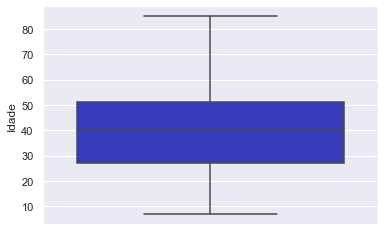

In [26]:
sns.boxplot(y=df["Idade"])

In [27]:
minimum_age = df["Idade"].min()
first_quantile = df["Idade"].quantile(0.25)
second_quantile = df["Idade"].quantile(0.5)
third_quantile = df["Idade"].quantile(0.75)
maximum_age = df["Idade"].max()

In [28]:
df["FaixaIdade"] = df["Idade"].apply(lambda x: faixa_idade(x, minimum_age, first_quantile, second_quantile, third_quantile, maximum_age))

In [29]:
df.head()

,ID,Genero,PlanoFidelidade,Idade,RazaoViagem,CategoriaPassagem,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada,SatisfacaoGeral,FaixaIdade
0,70172,Masculino,Sim,13,TurismoOuPessoal,Comforto,288.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Nao,7-27.0
1,5047,Masculino,Nao,25,NegociosOuTrabalho,Leito,147.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Nao,7-27.0
2,110028,Feminino,Sim,26,NegociosOuTrabalho,Leito,714.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Sim,7-27.0
3,24026,Feminino,Sim,25,NegociosOuTrabalho,Leito,351.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Nao,7-27.0
4,119299,Masculino,Sim,61,NegociosOuTrabalho,Leito,134.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Sim,51.0-90


## 4 - Data Analysis

### Criando dataframe codificado com label encoder

In [11]:
simnao_map = {"Sim": 1, "Nao": 0}
encoded_df = df.copy()
encoded_df["SatisfacaoGeral"] = df["SatisfacaoGeral"].map(simnao_map)
encoded_df["PlanoFidelidade"] = encoded_df["PlanoFidelidade"].map(simnao_map)
encoded_df["CategoriaPassagem"] = encoded_df["CategoriaPassagem"].map({"Normal": 0, "Comforto": 1, "Leito": 2})

label_encoders = dict()
for column in encoded_df.select_dtypes('object').columns:
    label_encoders[column] = LabelEncoder()
    encoded_df[column] = label_encoders[column].fit_transform(encoded_df[column])
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       103904 non-null  int64  
 1   Genero                   103904 non-null  int64  
 2   PlanoFidelidade          103904 non-null  int64  
 3   Idade                    103904 non-null  int64  
 4   RazaoViagem              103904 non-null  int64  
 5   CategoriaPassagem        103904 non-null  int64  
 6   DistanciaKm              103904 non-null  float64
 7   WiFi                     103904 non-null  int64  
 8   ConvenienciaHorarios     103904 non-null  int64  
 9   FacilidadeReservaViaApp  103904 non-null  int64  
 10  PontosLocalizacao        103904 non-null  int64  
 11  Alimentacao              103904 non-null  int64  
 12  CheckInViaApp            103904 non-null  int64  
 13  ConfortoInterno          103904 non-null  int64  
 14  Entr

### Análise de dados nulos

Text(0.5, 1.0, 'Heatmap de nulidade dos valores (verde significa nulo)')

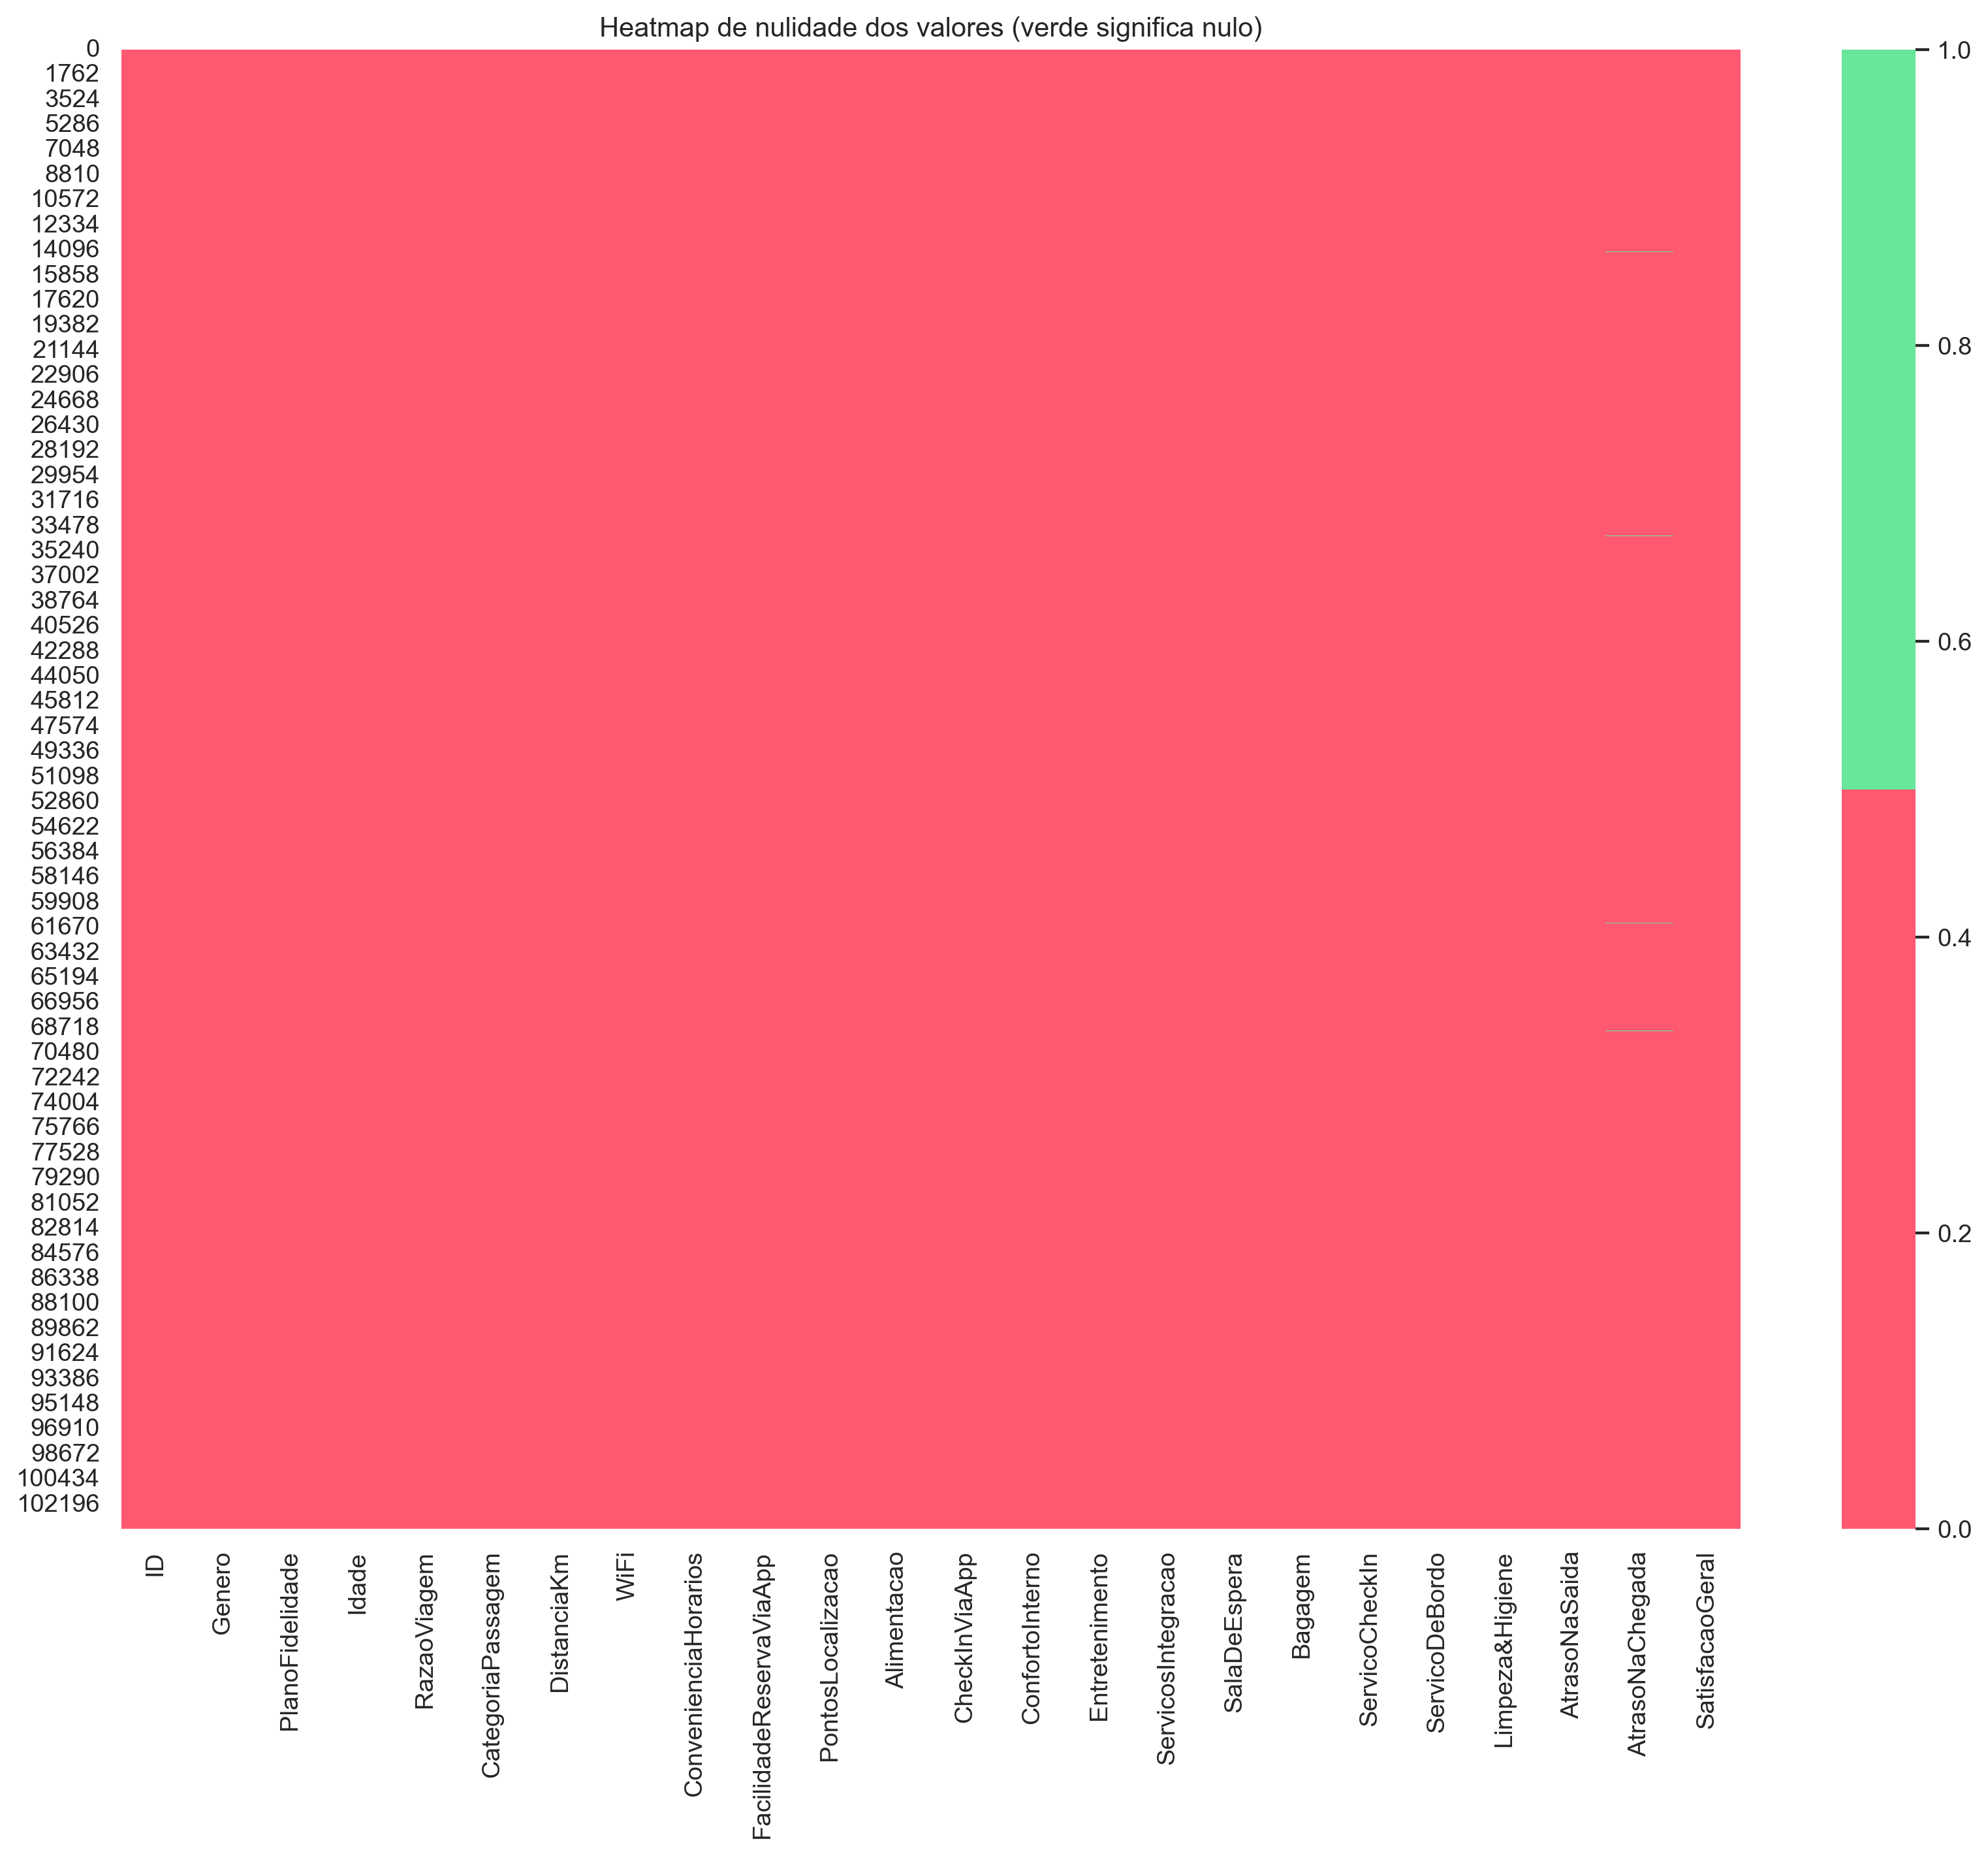

In [ ]:
plt.figure(figsize=(16, 12), dpi=250)
sns.heatmap(df.isna(), annot=False, cmap=dm_colors(n_colors=2, as_cmap=True))
plt.title('Heatmap de nulidade dos valores (verde significa nulo)')

In [ ]:
df["AtrasoNaChegada"].value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: AtrasoNaChegada, Length: 455, dtype: int64

* Verificando se existe algum valor 0, pois caso exista poderia existir a hipótese de que nulo fosse sem atraso. Porém esse não é o caso.

In [ ]:
df[df["AtrasoNaChegada"].isna()]

,ID,Genero,PlanoFidelidade,Idade,RazaoViagem,CategoriaPassagem,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada,SatisfacaoGeral
213,49608,Feminino,Sim,38,NegociosOuTrabalho,Normal,68.0,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,Sim
1124,73442,Masculino,Sim,53,TurismoOuPessoal,Normal,632.0,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,Nao
1529,71178,Masculino,Sim,39,NegociosOuTrabalho,Leito,458.0,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,Nao
2004,72940,Feminino,Nao,26,NegociosOuTrabalho,Leito,647.0,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,Nao
2108,116374,Feminino,Sim,24,TurismoOuPessoal,Normal,261.0,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Masculino,Sim,49,TurismoOuPessoal,Comforto,781.0,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN,Nao
102384,71241,Masculino,Sim,58,NegociosOuTrabalho,Normal,458.0,3,3,3,3,3,3,3,3,3,1,2,4,2,3,55,NaN,Nao
102552,27684,Feminino,Nao,29,NegociosOuTrabalho,Normal,692.0,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,Nao
102960,36787,Masculino,Sim,58,NegociosOuTrabalho,Normal,680.0,4,4,1,1,5,4,5,5,1,5,5,5,3,5,0,NaN,Sim


In [ ]:
df[df["AtrasoNaChegada"].isna()]["SatisfacaoGeral"].value_counts()

Nao    182
Sim    128
Name: SatisfacaoGeral, dtype: int64

* Será necessário realizar algum tratamento destes nulos, seja dropá-los ou preenchê-los. Posteriormente vamos testar o modelo preenchendo os nulos com zero e também dropando-os

### Análise de correlação

<AxesSubplot:>

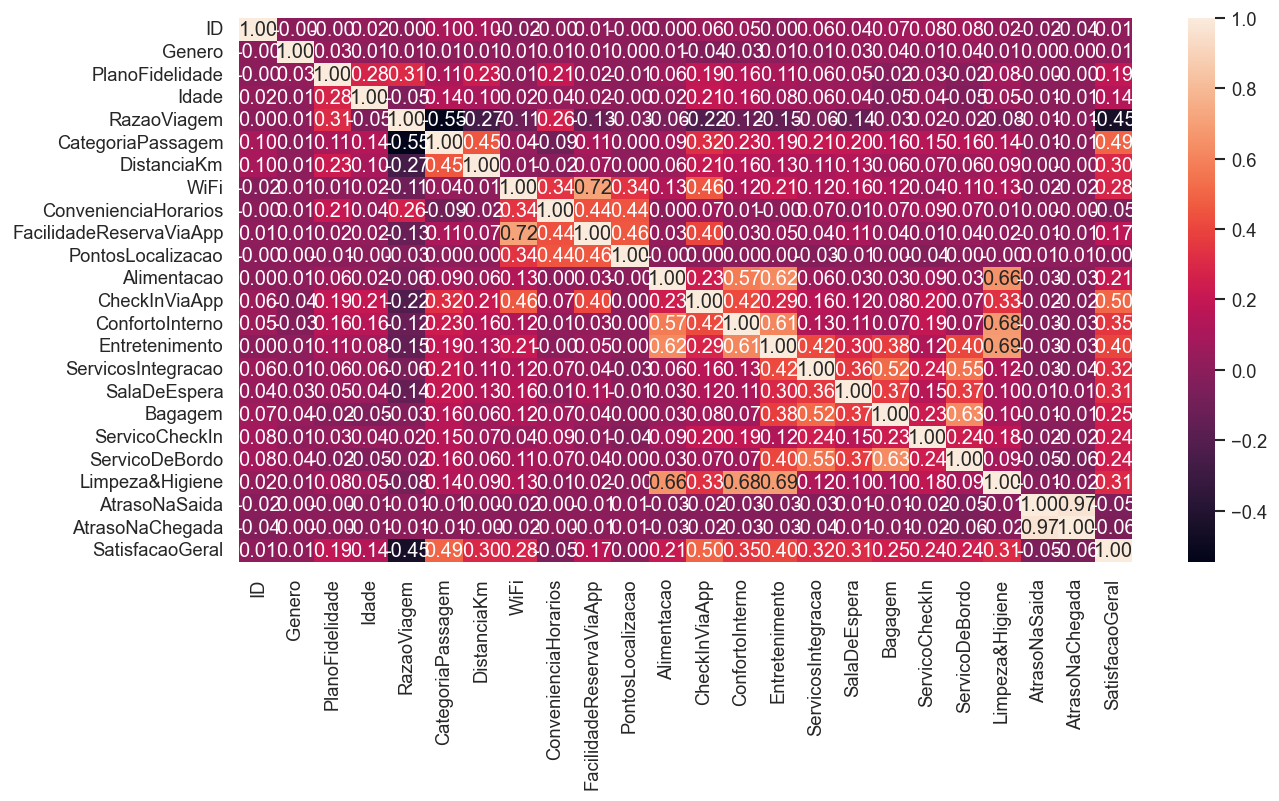

In [12]:
plt.figure(figsize=(12, 6), dpi=120)
sns.heatmap(data=encoded_df.corr(), annot=True, fmt=".2f")

#### Correlações a serem investigadas:
* Categoria da passagem com a satisfação geral
* Razão da viagem com Satisfação geral
* Checkin via app com satisfação geral
* Categoria da passagem com razão da viagem
* Entretenimento com satisfação geral

* Wifi com FacilidadeReservaViaApp
* DistaciaKm com CategoriaPassagem
* ServiçodeBordo com Bagagem, ServiçosIntegração e Entretenimento

### Análise da relação entre a categoria da passagem com a satisfação geral

Text(0, 0.5, 'Contagem')

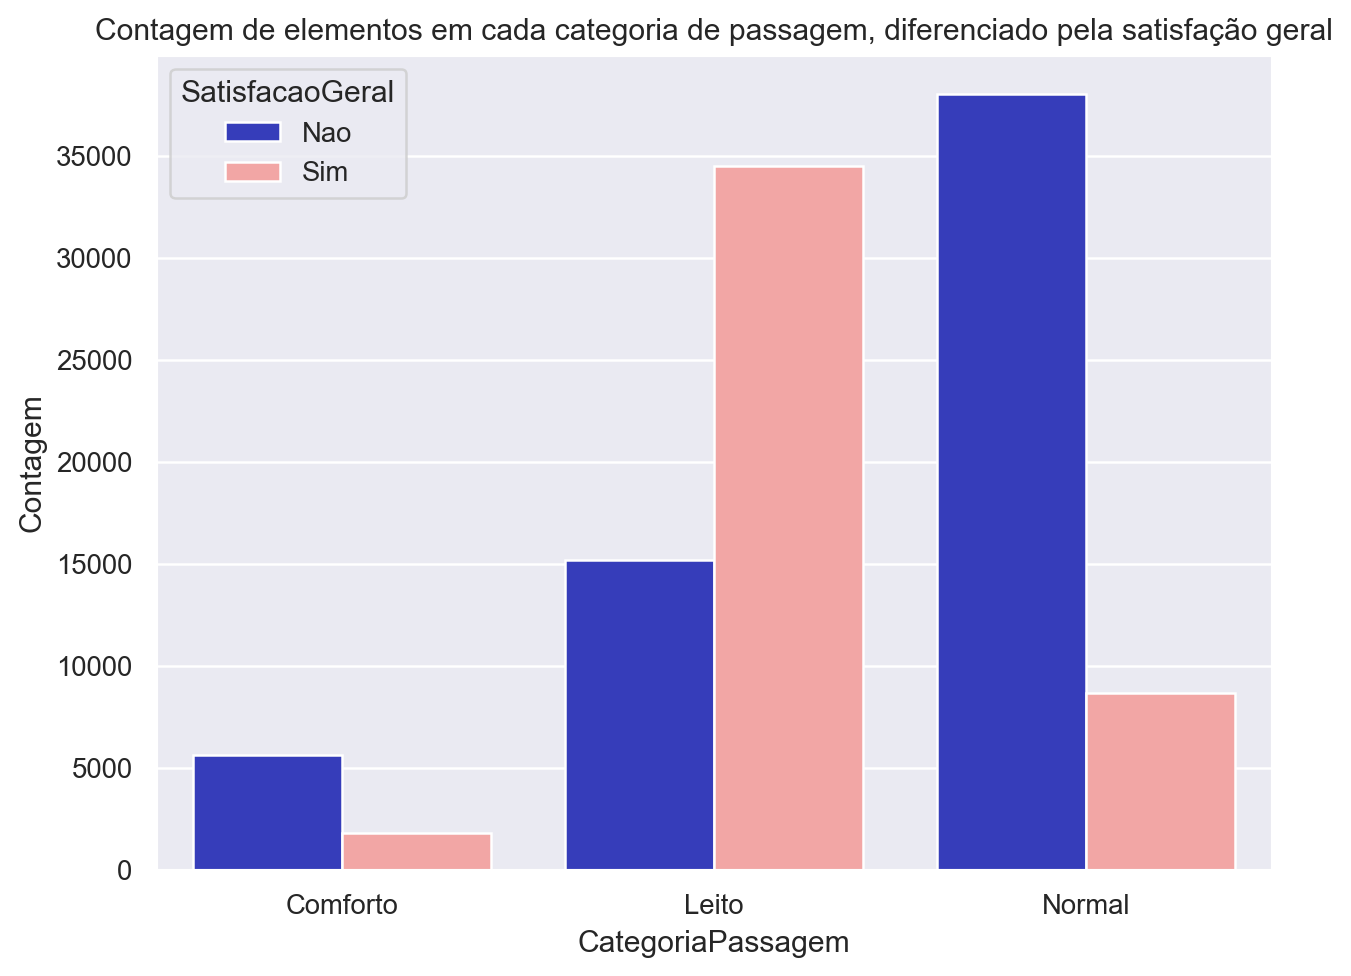

In [13]:
plt.figure(figsize=(8, 6), dpi=180)
sns.countplot(data=df, x='CategoriaPassagem', hue='SatisfacaoGeral')
plt.title('Contagem de elementos em cada categoria de passagem, diferenciado pela satisfação geral')
plt.ylabel('Contagem')

In [14]:
satisacao_categoria = df.groupby(by=["SatisfacaoGeral", "CategoriaPassagem"]).count()["ID"]

In [15]:
porcentagem_leito = df["CategoriaPassagem"].value_counts()["Leito"]/df.shape[0]
porcentagem_normal = df["CategoriaPassagem"].value_counts()["Normal"]/df.shape[0]

print(f'De todas as entradas {porcentagem_leito*100:.2f}% representam passagens do tipo "Leito", enquanto que {porcentagem_normal*100:.2f}% representam passagens do tipo "Normal"')

De todas as entradas 47.80% representam passagens do tipo "Leito", enquanto que 44.99% representam passagens do tipo "Normal"


In [16]:
leito_sim = satisacao_categoria.loc["Sim"]["Leito"]/(satisacao_categoria.loc["Sim"]["Leito"]+satisacao_categoria.loc["Nao"]["Leito"])
leito_nao = satisacao_categoria.loc["Nao"]["Leito"]/(satisacao_categoria.loc["Sim"]["Leito"]+satisacao_categoria.loc["Nao"]["Leito"])

print(f'Das passagens de leito, {leito_sim*100:.2f}% respondeu sim para satisfação, enquanto que {leito_nao*100:.2f}% responderam não para a satisfação')

Das passagens de leito, 69.43% respondeu sim para satisfação, enquanto que 30.57% responderam não para a satisfação


In [17]:
normal_sim = satisacao_categoria.loc["Sim"]["Normal"]/(satisacao_categoria.loc["Sim"]["Normal"]+satisacao_categoria.loc["Nao"]["Normal"])
normal_nao = satisacao_categoria.loc["Nao"]["Normal"]/(satisacao_categoria.loc["Sim"]["Normal"]+satisacao_categoria.loc["Nao"]["Normal"])

print(f'Das passagens de normal, {normal_sim*100:.2f}% respondeu sim para satisfação, enquanto que {normal_nao*100:.2f}% responderam não para a satisfação')

Das passagens de normal, 18.61% respondeu sim para satisfação, enquanto que 81.39% responderam não para a satisfação


* De forma geral, passagens de leito tem um maior nível de satisfação enquanto que passagens do tipo "Normal" possui uma menor proporção de satisfação.
* Além disso, em termos gerais, os clientes preferem optar por passagens do tipo "Normal" ou "Leito", tendo pouca preferência por "Comforto".
* Nas passagens do tipo conforto os clientes normalmente possuem um nível menor de satisfação.

### Análise da satisfação geral em relação à Razão da viagem

Text(0, 0.5, 'Contagem')

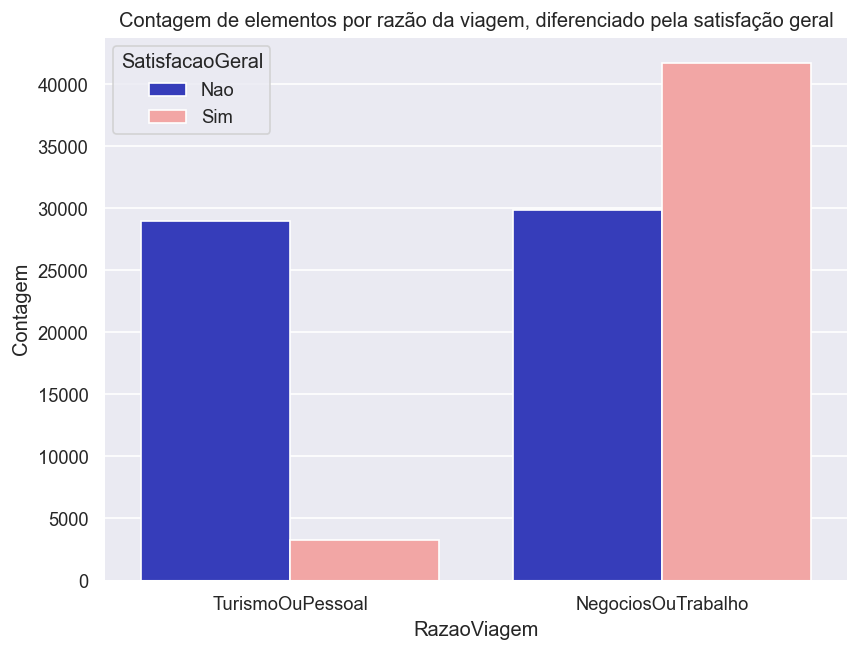

In [18]:
plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(data=df, x='RazaoViagem', hue='SatisfacaoGeral')
plt.title('Contagem de elementos por razão da viagem, diferenciado pela satisfação geral')
plt.ylabel('Contagem')

### Análise da categoria da passagem com a razão da viagem

Text(0, 0.5, 'Contagem')

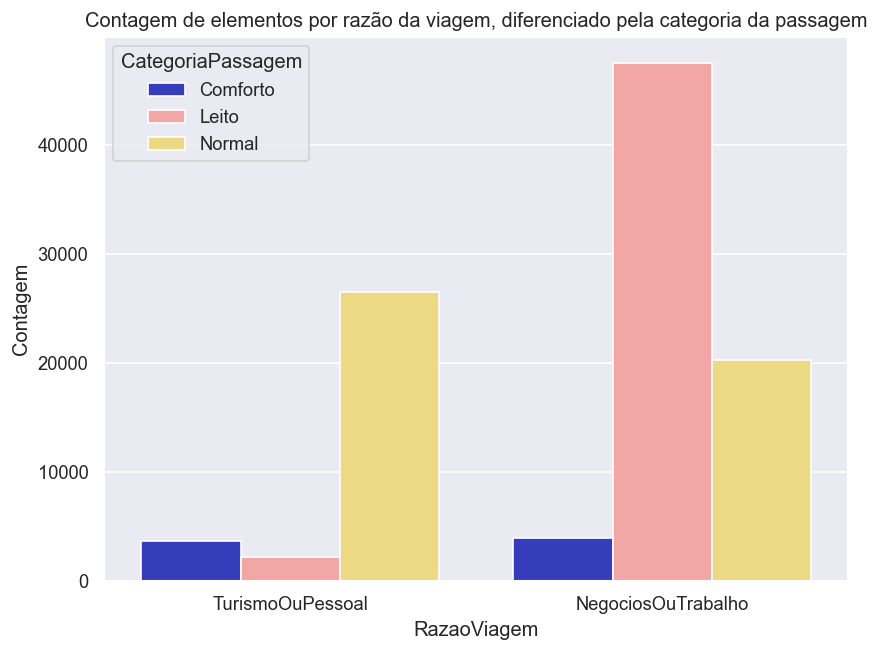

In [19]:
plt.figure(figsize=(8, 6), dpi=120)
sns.countplot(data=df, x='RazaoViagem', hue='CategoriaPassagem')
plt.title('Contagem de elementos por razão da viagem, diferenciado pela categoria da passagem')
plt.ylabel('Contagem')

* Uma parcela maior das passagens com o intuito de negocios ou trabalho compram leito, enquanto que em turismo ou pessoal compram normal

### Análise do entretenimento com a Satisfação geral

Text(0.5, 1.0, 'Contagem de elementos por Entretenimento, diferenciado pela satisfação geral')

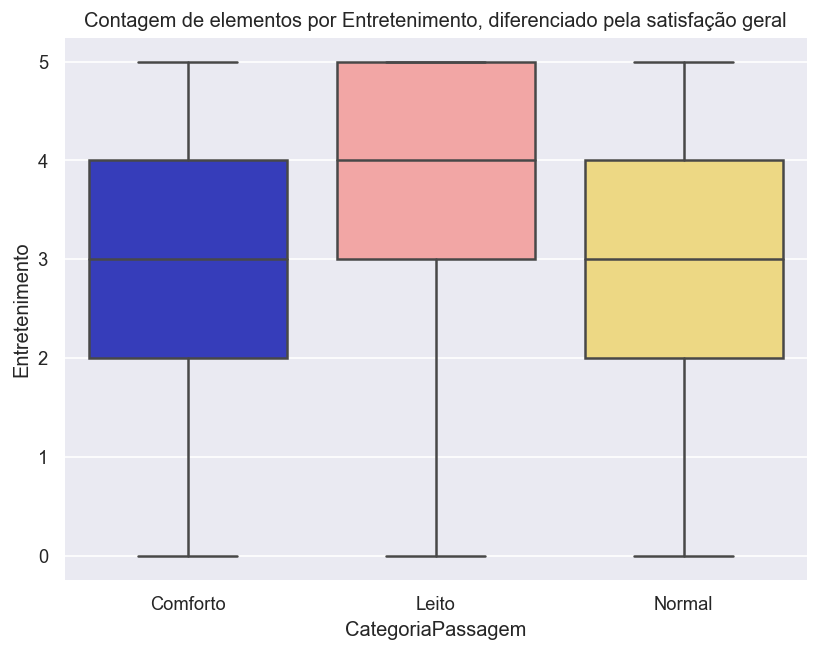

In [20]:
plt.figure(figsize=(8, 6), dpi=120)
sns.boxplot(data=df, y='Entretenimento', x='CategoriaPassagem')
plt.title('Contagem de elementos por Entretenimento, diferenciado pela satisfação geral')

* As notas de satisfação quanto ao entretenimento são maiores em passagens do tipo "Leito"

### Qual será a relação dada pelo motivo da viagem, a categoria da passagem e a satifação geral?

In [21]:
df[["SatisfacaoGeral", "RazaoViagem", "CategoriaPassagem"]].value_counts().unstack()

CategoriaPassagem                   Comforto  Leito  Normal
SatisfacaoGeral RazaoViagem                                
Nao             NegociosOuTrabalho      2360  13292   14257
                TurismoOuPessoal        3290   1893   23787
Sim             NegociosOuTrabalho      1530  34216    6000
                TurismoOuPessoal         314    264    2701

### Análise do Wifi com a Facilidade de Reserva via App

In [23]:
df[["WiFi", "FacilidadeReservaViaApp"]]

,WiFi,FacilidadeReservaViaApp
0,3,3
1,3,3
2,2,2
3,2,5
4,3,3
...,...,...
103899,2,2
103900,4,4
103901,1,1
103902,1,1


Text(0.5, 1.0, 'Análise de correlação entre a nota do wifi e a facilidade de reserva via app')

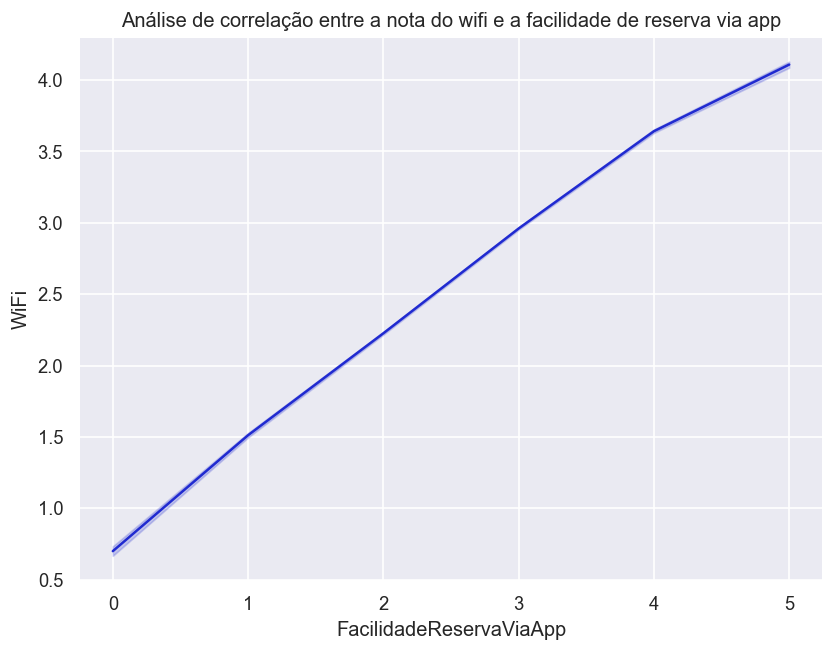

In [32]:
plt.figure(figsize=(8, 6), dpi=120)
sns.lineplot(data=df, y='WiFi', x='FacilidadeReservaViaApp')
plt.title('Análise de correlação entre a nota do wifi e a facilidade de reserva via app')
# plt.ylabel('Contagem')

* Um hipótese é que pessoas que consideram ter uma maior facilidade de reserva via app tem preferência por ônibus com WiFi e portanto podem ter escolhido um cujo serviço de WiFi seja melhor.

### Análise de outliers

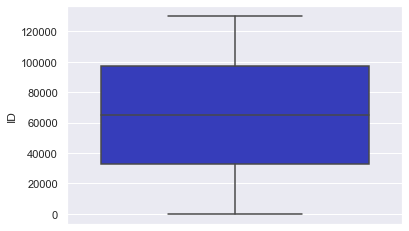

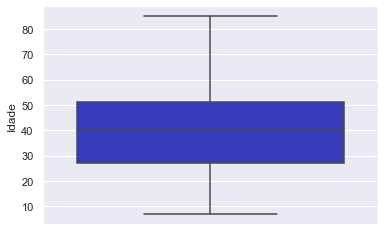

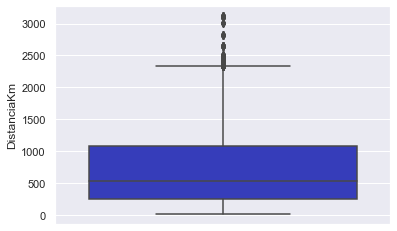

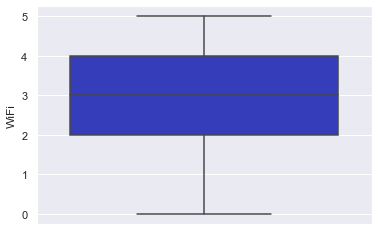

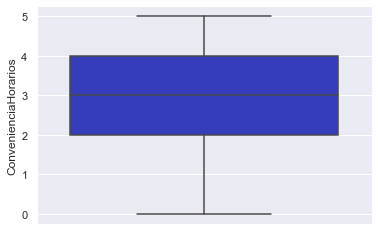

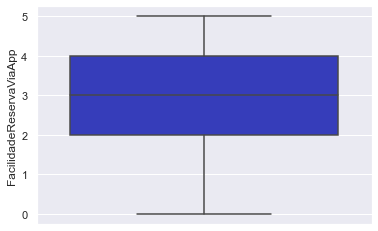

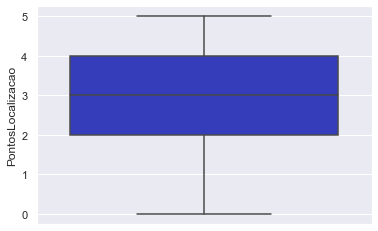

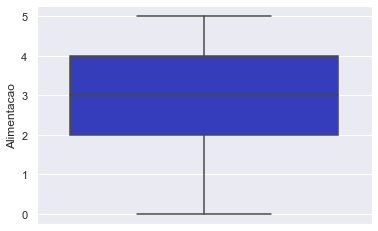

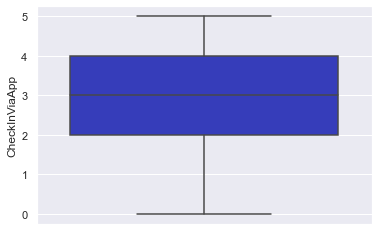

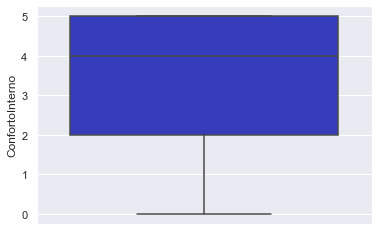

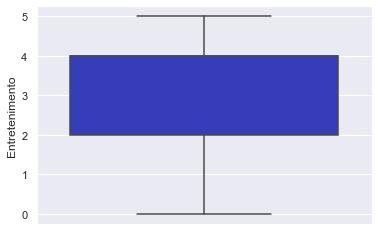

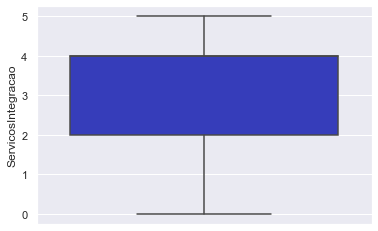

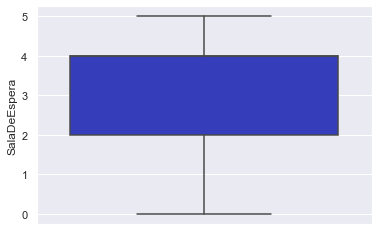

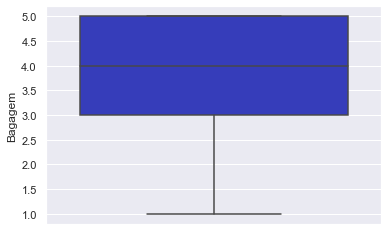

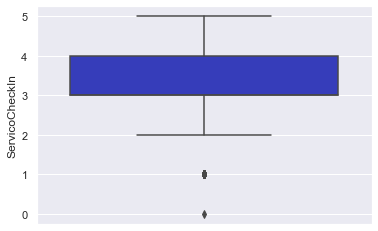

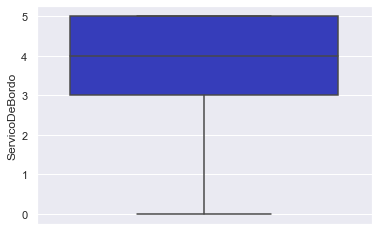

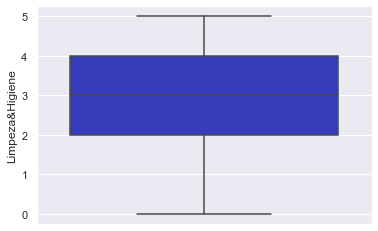

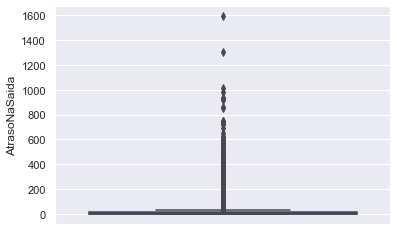

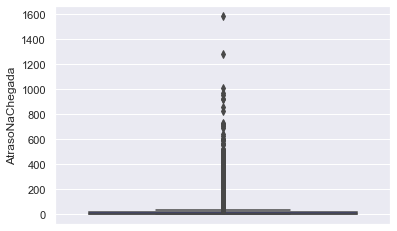

In [25]:
for column in df.select_dtypes(["int", "float"]).columns:
    sns.boxplot(data=df, y=column)
    plt.show()

* Os outliers da distancia em km e da nota de serviço de check-in não serão tratados, pois são plausíveis.
* Os outliers do atraso na chegada e saída devem ser tratados, pois tem valores bem altos pra um atraso (1600 minutos é 26 horas por exemplo)